In [1]:
import importlib
import sys
import pickle
import numpy as np
import pandas as pd

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')
sys.path.insert(0, '../../../..')
sys.path.insert(0, '../../../../..')
sys.path.insert(0, '../../../../../..')

In [2]:
with open("Repair_shop_eval.pkl", "rb") as file:
    all_results = pickle.load(file)

import src.evaluation_metrics.plots
importlib.reload(src.evaluation_metrics.plots)

res_raw, c = all_results['../../../../../../../data/repair_shop/gn_l4/']

In [3]:
with open("../../../../reimplemented_comparable_approaches/camargo_LSTM_suffix_pred/notebooks/evaluation/Repair_shop/Repair_eval.pkl", "rb") as file:
    camargo_results = pickle.load(file)


camargo_raw, camargo_c = camargo_results['../../../../../../../../data/repair_shop/eval_camargo_sl5/']

with open("../../../../reimplemented_comparable_approaches/weytjens_unc_rem_time/notebooks/evaluation/Repair_shop/repair_shop_eval.pkl", "rb") as file:
    weytjens_results = pickle.load(file)

weytjens_raw, weytjens_c = weytjens_results['../../../../../../../../data/repair_shop/eval_weytjens_sl5/']

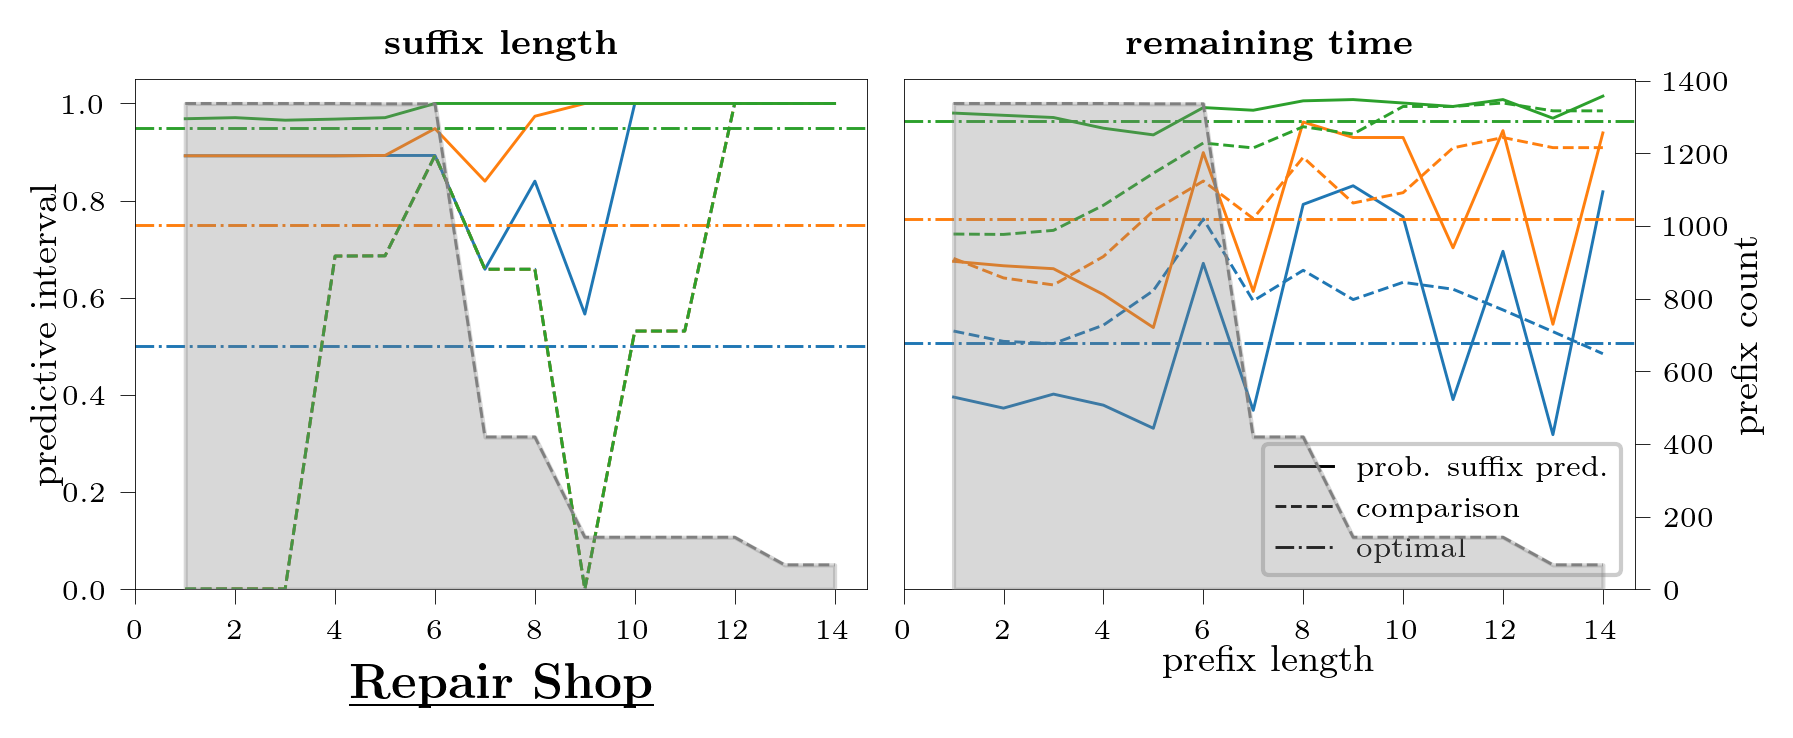

In [4]:

import src.evaluation_metrics.plots
importlib.reload(src.evaluation_metrics.plots)


keys_to_keep = [
                ('SumValuesInterval_50', 'SumValuesInterval_50'),
                ('SumValuesInterval_75', 'SumValuesInterval_75'),
                ('SumValuesInterval_95', 'SumValuesInterval_95'),
]
keys_to_keep = [
                ('LastValueInterval_50', 'LastValueInterval_50'),
                ('LastValueInterval_75', 'LastValueInterval_75'),
                ('LastValueInterval_95', 'LastValueInterval_95'),
]
res_1 = {(k, label) : res_raw[k] for k, label in keys_to_keep}

keys_to_keep = [
                ('LastValueInterval_50', 'LastValueInterval_50'),
                ('LastValueInterval_75', 'LastValueInterval_75'),
                ('LastValueInterval_95', 'LastValueInterval_95'),
]
wey_res = {(k, label) : weytjens_raw[k] for k, label in keys_to_keep}

keys_to_keep = [
                ('SuffixCountInterval_50', 'SuffixCountInterval_50'),
                ('SuffixCountInterval_75', 'SuffixCountInterval_75'),
                ('SuffixCountInterval_95', 'SuffixCountInterval_95'),
]
res_2 = {(k, label) : res_raw[k] for k, label in keys_to_keep}
cam_res = {(k, label) : camargo_raw[k] for k, label in keys_to_keep}



p = src.evaluation_metrics.plots.plot_2_4_intervals(res_2, res_1, cam_res, wey_res, caption='Repair Shop', pgf=True)#int(len(keys_to_keep)))

with open('Repair_shop_intervals_comparison_suffix.pgf', 'wb') as f:
    f.write(p)

In [5]:
print('Suffix Count: 50%')
print(np.mean([i['prob'][0] for i in res_raw['SuffixCountInterval_50'].values()]))
print('Suffix Count: 75%')
print(np.mean([i['prob'][0] for i in res_raw['SuffixCountInterval_75'].values()]))
print('Suffix Count: 95%')
print(np.mean([i['prob'][0] for i in res_raw['SuffixCountInterval_95'].values()]))

Suffix Count: 50%
0.8814303638644918
Suffix Count: 75%
0.9094521120869928
Suffix Count: 95%
0.9781472187369301


In [6]:
print('Suffix Count: 50%')
print(np.mean([i['prob'][0] for i in camargo_raw['SuffixCountInterval_50'].values()]))
print('Suffix Count: 75%')
print(np.mean([i['prob'][0] for i in camargo_raw['SuffixCountInterval_75'].values()]))
print('Suffix Count: 95%')
print(np.mean([i['prob'][0] for i in camargo_raw['SuffixCountInterval_95'].values()]))

Suffix Count: 50%
0.41917607695524883
Suffix Count: 75%
0.4192806357172731
Suffix Count: 95%
0.41938519447929734


In [7]:
print('Remainging Time: 50%')
print(np.mean([i['prob'][0] for i in res_raw['SumValuesInterval_50'].values()]))
print('Remaining Time: 75%')
print(np.mean([i['prob'][0] for i in res_raw['SumValuesInterval_75'].values()]))
print('Remaining Time: 95%')
print(np.mean([i['prob'][0] for i in res_raw['SumValuesInterval_95'].values()]))

Remainging Time: 50%
0.4345462149728147
Remaining Time: 75%
0.7761396905060645
Remaining Time: 95%
0.9653910497699707


In [8]:
print('Remainging Time: 50%')
print(np.mean([i['prob'][0] for i in res_raw['LastValueInterval_50'].values()]))
print('Remaining Time: 75%')
print(np.mean([i['prob'][0] for i in res_raw['LastValueInterval_75'].values()]))
print('Remaining Time: 95%')
print(np.mean([i['prob'][0] for i in res_raw['LastValueInterval_95'].values()]))


Remainging Time: 50%
0.44866164784608953
Remaining Time: 75%
0.6867419489753241
Remaining Time: 95%
0.9576537013801757


In [9]:
print('Remainging Time: 50%')
print(np.mean([i['prob'][0] for i in weytjens_raw['LastValueInterval_50'].values()]))
print('Remaining Time: 75%')
print(np.mean([i['prob'][0] for i in weytjens_raw['LastValueInterval_75'].values()]))
print('Remaining Time: 95%')
print(np.mean([i['prob'][0] for i in weytjens_raw['LastValueInterval_95'].values()]))


Remainging Time: 50%
0.5740276035131744
Remaining Time: 75%
0.7200961940610623
Remaining Time: 95%
0.8078209953994144
